In [37]:
import astropy
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
from matplotlib.pyplot import figure

In [2]:
#APOKASC file & file variables
hdul = fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.7.2.fits")
#hdul.info()
hdu = hdul[1]
data = hdu.data
#print(np.shape(data))
KIC_A = hdu.data['KEPLER_INT'] 
Logg_A = hdu.data['DR16_LOGG_COR']
Logg_err = hdu.data['DR16_LOGG_COR_ERR']
Teff_A = hdu.data['DR16_TEFF_COR']
Teff_err = hdu.data['DR16_TEFF_COR_ERR']
FeH_A = hdu.data['DR16_M_H_COR']
FeH_A_err = hdu.data['Dr16_M_H_COR_ERR']
#print(Logg_A)
FeH_err = hdu.data['DR16_M_H_COR_ERR']
R_APO3 = hdu.data['APOKASC3P_RADIUS']
R_APO3_err = hdu.data['APOKASC3P_RADIUS_ERR']
R_Gaia = hdu.data['GAIA_RADIUS'] #no error on this radius
M_APO3 = hdu.data['APOKASC3P_MASS']
M_APO3_err = hdu.data['APOKASC3P_MASS_ERR']

In [3]:
#f = open('/Users/amber3/Desktop/gaia_radii_apokasc3 .dat', 'r')
#header = f.readline()
#print(header)
#there are some empty entries in error and radius, so flags are put in as -42 and only pos entries are taken
R_data = ascii.read('/Users/amber3/Desktop/gaia_radii_apokasc3 .dat', delimiter = ',') #data_Splitter = 'KIC') #fill_values = [('-42.0', '', '-42.0')])
KIC_Gaia = R_data['KIC']
R_Gaia = 1.0/R_data['inv_r_gaia_K_MIST']
#R_Gaia_err = 1.0/R_data['inv_r_gaia_K_MIST_err']
R_Gaia_err_per = R_data['inv_r_gaia_K_MIST_err']/R_data['inv_r_gaia_K_MIST'] 
R_Gaia_err = R_Gaia_err_per * R_Gaia
#help(R_Gaia[0])
#print(KIC_Gaia[0])
#print(type(KIC_Gaia))
print(R_Gaia_err)

#KIC_Gaia = 
#for lines in R_data:
    #cols = lines.strip('\n').split(',')
    #print(cols)
    #KIC_Gaia = int(cols[0])
    #Gaia_rad = 1.0/float(cols[1])
    #Gaia_rad_err = 1.0/float(cols[2])
    #print(Gaia_rad)
#cols = R_data.split(',')
#print(np.shape(cols))

inv_r_gaia_K_MIST_err
---------------------
   1.1329750550674924
   0.3980318757106232
    0.599982638317747
   0.3656148490948969
  0.22786523565522532
    2.165530361313312
  0.44468518817024905
                  ...
    49.38366116265747
   0.8207903397948537
    8.380984118907424
     9.98327494418534
   369.12395747674947
    22.79847535484972
   23.205236370197742
Length = 12632 rows


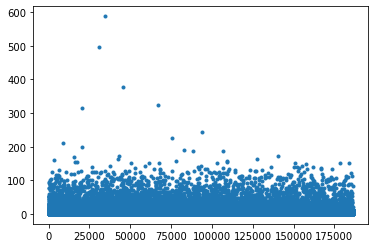

In [4]:
#read in 2020 Berger R file, follow same process
hdul = fits.open(r"/Users/amber3/Desktop/asu.fit")
hdu = hdul[1]
KIC_Berger = hdu.data['KIC']
Berger_rad = hdu.data['Rad']
Berger_upper_err = hdu.data['E_Rad']
Berger_lower_err = hdu.data['e_rad_lc']
plt.plot(Berger_rad, '.')
#compare 2020 Berger radii with APO3 R
#intersection of both KIC and plotting both radii (one against the other)

In [5]:
#APOLLINAIRE file & file variables (b = background)
hdul_b = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
hdu_b = hdul_b[0]
data_b = hdu_b.data
KIC_b = np.array(data_b[:,0,0])
#print(KIC_b)

In [6]:
#APAOKASC and background intersection and filtering
common_KIC, A_indices, b_indices = np.intersect1d(KIC_A, KIC_b, return_indices=True)
#print(np.shape(A_indices), np.shape(b_indices))
good_indices = np.where((Teff_A[A_indices] > 0) & (R_APO3[A_indices] > 0))
bad_indices = np.where(np.logical_or(Teff_A[A_indices] <= 0, R_APO3[A_indices] <= 0))
#bad_T_indices = np.where(Teff_A[A_indices] <= 0)
#bad_R_indices = np.where(R_APO3[A_indices] <= 0)
#print(Teff_A[A_indices[bad_T_indices]], R_APO3[A_indices[bad_R_indices]])
print(Teff_A[A_indices[bad_indices]], R_APO3[A_indices[bad_indices]])
print(bad_indices)
b_indices = b_indices[good_indices]
A_indices = A_indices[good_indices]
print(np.where(Teff_A[A_indices] < 0))
print(A_indices)
print(np.where(R_APO3[A_indices] < 0))

KIC_b = KIC_b[b_indices]
logg_final = Logg_A[A_indices]
logg_final_err = Logg_err[A_indices]
Teff_final = Teff_A[A_indices]
#print(Teff_final)
#print(np.where(Teff_final < 0)) 
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[A_indices]
Teff_err_log = ((Teff_final_err)/(log_Teff_final))/np.log(10) 
FeH_final = FeH_A[A_indices]
FeH_final_err = FeH_A_err[A_indices]

print(np.shape(logg_final), np.shape(KIC_b))
Amp_HV1 = np.array(data_b[b_indices,0,6])
Amp_HV1_err = np.array(data_b[b_indices,1,6])
Amp_HV2 = np.array(data_b[b_indices,0,9])
Amp_HV2_err = np.array(data_b[b_indices,1,9])
Freq_HV1 = np.array(data_b[b_indices,0,7])
Freq_HV1_err = np.array(data_b[b_indices,1,7])
Freq_HV2 = np.array(data_b[b_indices,0,10])
Freq_HV2_err = np.array(data_b[b_indices,1,10])
Evol_stage = np.array(data_b[b_indices,0,3])
#Gaussian_amp = np.array(data_b[b_indices,0,14])
#Gaussian_width = np.array(data_b[b_indices,0,16])
#print(KIC_A, KIC_b)

[-9999.99  -9999.99  -9999.99   4805.594 -9999.99  -9999.99  -9999.99
 -9999.99  -9999.99  -9999.99 ] [-9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999.]
(array([ 318,  761,  794, 1898, 2156, 2211, 3250, 3297, 3401, 3605]),)
(array([], dtype=int64),)
[ 863 4166 4232 ... 5782 5784 5795]
(array([], dtype=int64),)
(3990,) (3990,)


In [7]:
#Gaia and background intersection and filtering
print(np.shape(KIC_b), np.shape(Amp_HV1))
common_KIC_G, A_indices_G, b_indices_G = np.intersect1d(KIC_Gaia, KIC_b, return_indices=True)
good_indices_G = np.where((R_Gaia[A_indices_G] > 0) & (R_Gaia_err[A_indices_G] > 0))
b_indices_G = b_indices_G[good_indices_G]
A_indices_G = A_indices_G[good_indices_G]

print(np.shape(A_indices_G), np.shape(b_indices_G))
KIC_final = KIC_Gaia[A_indices_G]
#use amps and freq data from previous data file 

logg_final_G = logg_final[b_indices_G]
logg_final_G_err = logg_final_err[b_indices_G]
Teff_final_G = Teff_final[b_indices_G]
#print(Teff_final)
#plt.plot(Teff_final_G, logg_final_G, '.')
#print(np.where(Teff_final_G < 0)) 
#print(np.shape(Teff_A), np.shape(Logg_A))
log_Teff_final_G = np.log10(Teff_final_G)
Teff_final_G_err = Teff_final_err[b_indices_G]
Teff_G_err_log = ((Teff_final_G_err)/(log_Teff_final_G))/np.log(10) 
FeH_final_G = FeH_final[b_indices_G]
FeH_final_G_err = FeH_final_err[b_indices_G]

Amp_HV1_G = Amp_HV1[b_indices_G]
Amp_HV1_G_err = Amp_HV1_err[b_indices_G]
Amp_HV2_G = Amp_HV2[b_indices_G]
Amp_HV2_G_err = Amp_HV2_err[b_indices_G]
Freq_HV1_G = Freq_HV1[b_indices_G]
Freq_HV1_G_err = Freq_HV1_err[b_indices_G]
Freq_HV2_G = Freq_HV2[b_indices_G]
Freq_HV2_G_err = Freq_HV2_err[b_indices_G]
Evol_stage_G = Evol_stage[b_indices_G]

#resave Gaia rad, err on rad, and all harvey params 
#ex: Amp_HV1_final = Amp_HV1[b_indices_G]

(3990,) (3990,)
(3647,) (3647,)


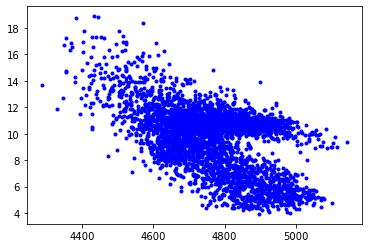

In [8]:
plt.plot(Teff_A[A_indices], R_APO3[A_indices], 'b.')

(3647,)


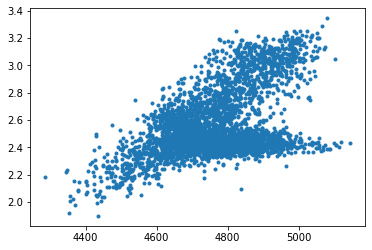

In [9]:
R_APO3_final = R_APO3[A_indices]
R_APO3_final_err = R_APO3_err[A_indices]
R_Gaia_final = R_Gaia[A_indices_G] 
print(np.shape(R_Gaia_final))
R_Gaia_final_err = R_Gaia_err[A_indices_G]

#logg_final = Logg_A[A_indices]
#logg_final_err = Logg_err[A_indices]
#Teff_final = Teff_A[A_indices]
#print(Teff_final)
#print(np.where(Teff_final < 0)) 
#log_Teff_final = np.log10(Teff_final)
#Teff_final_err = Teff_err[A_indices]
#Teff_err_log = ((Teff_final_err)/(log_Teff_final))/np.log(10) 
#FeH_final = FeH_A[A_indices]
#FeH_final_err = FeH_A_err[A_indices]

#plt.plot(Teff_A, Logg_A, '.')
#logg_final_G = Logg_A[A_indices_G]
#logg_final_G_err = Logg_err[A_indices_G]
#Teff_final_G = Teff_A[A_indices_G]
#print(Teff_final)

plt.plot(Teff_final_G, logg_final_G, '.')
#print(np.where(Teff_final_G < 0)) 
#log_Teff_final_G = np.log10(Teff_final_G)
#Teff_final_G_err = Teff_err[A_indices_G]
#Teff_G_err_log = ((Teff_final_G_err)/(log_Teff_final_G))/np.log(10) 
#FeH_final_G = FeH_A[A_indices_G]
#FeH_final_G_err = FeH_A_err[A_indices_G]
#print(log_Teff_final) #runtime warning with neg values?
#print(Teff_err_log)

rpw = 2

Amp_R_HV1_APO3 =  Amp_HV1 * R_APO3_final**rpw
#Amp_R_HV1_APO3_err = ((Amp_HV1_err/Amp_HV1) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_R_HV1_APO3
Amp_R_HV1_APO3_err_log = np.sqrt((Amp_HV1_err/Amp_HV1)**2 + (rpw*R_APO3_final_err/R_APO3_final)**2)/np.log(10)

Amp_R_HV2_APO3 =  Amp_HV2 * R_APO3_final**rpw
#Amp_R_HV2_APO3_err = ((Amp_HV2_err/Amp_HV2) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_R_HV2_APO3
Amp_R_HV2_APO3_err_log = np.sqrt((Amp_HV2_err/Amp_HV2)**2 + (rpw*R_APO3_final_err/R_APO3_final)**2)/np.log(10)

Amp_R_HV1_Gaia =  Amp_HV1_G * R_Gaia_final**rpw
Amp_R_HV1_Gaia_err_log = np.sqrt((Amp_HV1_G_err/Amp_HV1_G)**2 + (rpw*R_Gaia_final_err/R_Gaia_final)**2) 

Amp_R_HV2_Gaia =  Amp_HV2_G * R_Gaia_final**rpw
Amp_R_HV2_Gaia_err_log = np.sqrt((Amp_HV2_G_err/Amp_HV2_G)**2 + (rpw*R_Gaia_final_err/R_Gaia_final)**2)

Amp_HV1_err_log = ((Amp_HV1_err)/(Amp_HV1))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_err)/(Amp_HV2))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_err)/(Freq_HV1))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_err)/(Freq_HV2))/np.log(10)

Amp_HV1_G_err_log = ((Amp_HV1_G_err)/(Amp_HV1_G))/np.log(10)
Amp_HV2_G_err_log = ((Amp_HV2_G_err)/(Amp_HV2_G))/np.log(10)
Freq_HV1_G_err_log = ((Freq_HV1_G_err)/(Freq_HV1_G))/np.log(10)
Freq_HV2_G_err_log = ((Freq_HV2_G_err)/(Freq_HV2_G))/np.log(10)

2.694704 3.6761162
A1_RG
[ 3.65773256 -9.75343131 -1.93054871 -0.0323873 ]
[0.00383415 0.52408347 0.01171772 0.01635012]
A1_RC
[  4.08869488 -19.31102444  -1.33376156  -0.80702151]
[0.01173537 0.54429958 0.03153781 0.02359385]
A2_RG
[ 2.9979083  -8.70223622 -2.06085666 -0.01834655]
[0.00425431 0.57752987 0.01283791 0.01783101]
A2_RC
[  3.42893417 -19.77150839  -1.44584805  -0.93976798]
[0.01267877 0.61411842 0.03396103 0.02631364]


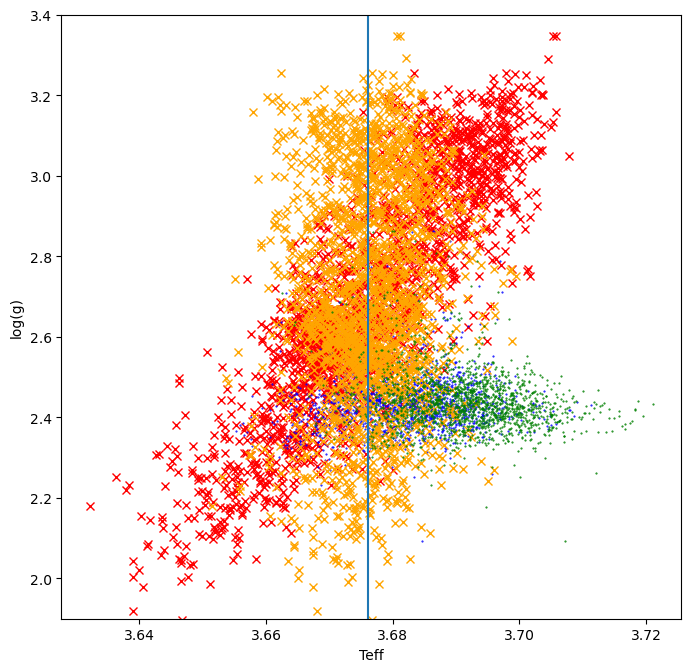

In [10]:
#APO3 rotated to atm params data

#%matplotlib inline
figure(figsize=(8,8), dpi=100)
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def logg_fit(X, a, b):
    x = X
    return a + b*x
         
red_giant = np.where(Evol_stage == 1)
red_clump = np.where(Evol_stage == 2)
#print(Teff_final[red_giant])

mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(log_Teff_final[red_giant])
print(mean_logg, mean_l_teff) #neg value in log_Teff_final bc of runtime warning in Teff_final, printing nan

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7

theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#rotated plots
x_prime = (log_Teff_final-mean_l_teff)*np.cos(theta) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = (log_Teff_final-mean_l_teff)*np.sin(theta) + ((logg_final-mean_logg)*np.cos(theta))
coeffs = np.ones((4, 6, 2)) #switch 2 and 4?
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(log_Teff_final[red_giant], logg_final[red_giant], 'rx')
plt.plot(log_Teff_final[red_clump], logg_final[red_clump], 'b.', ms=1)
plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x', color='orange')
plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, 'g.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

In [11]:
#fit in rotated atm params with respect to APO3 R corrected amps

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_R_HV1_APO3[red_giant]), sigma=(Amp_R_HV1_APO3_err_log[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_R_HV1_APO3[red_clump]), sigma=(Amp_R_HV1_APO3_err_log[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_R_HV2_APO3[red_giant]), sigma=(Amp_R_HV2_APO3_err_log[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_R_HV2_APO3[red_clump]), sigma=(Amp_R_HV2_APO3_err_log[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.52396042 -4.74692705 -2.8822549   0.30129024]
[0.00598725 0.85877112 0.01901335 0.02671451]
A1_RC
[  6.16212644 -20.18203567  -1.41964945  -0.73017541]
[0.01280778 0.59450446 0.03438819 0.02577636]
A2_RG
[ 4.86349083 -3.65356419 -3.01714371  0.32267611]
[0.00657086 0.91094299 0.02015133 0.02810394]
A2_RC
[  5.51010671 -21.24625202  -1.54798993  -0.88402403]
[0.01408645 0.68176753 0.03771912 0.02922848]


In [12]:
#matched subsample of giants+clump of A1 and A2 with APO3 R
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)

index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))

index_RC = index_RC[iu]
index_RG = index_RG[iu]

#amplitude 1 red giants and clump subsample
Amp_HV1_RG = Amp_R_HV1_APO3[red_giant]
Amp_HV1_RC = Amp_R_HV1_APO3[red_clump]

index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_R_HV1_APO3_err_log[red_giant]

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

Amp_HV1_err_log_RC = Amp_R_HV1_APO3_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

#amplitude 2 red giants and clump subsample
Amp_HV2_RG = Amp_R_HV2_APO3[red_giant]
Amp_HV2_RC = Amp_R_HV2_APO3[red_clump]

index_inliers = np.where((np.log10(Amp_HV2_RG[index_RG])-np.log10(Amp_HV2_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV2_err_log_RG = Amp_R_HV2_APO3_err_log[red_giant]

A2_Rg_s_opt, A2_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV2_RG[index_RG]), sigma=(Amp_HV2_err_log_RG[index_RG]))
A2_Rg_s_perr = np.sqrt(np.diag(A2_Rg_s_cov))
print()
print('A2_RG_s')
print(A2_Rg_s_opt)
print(A2_Rg_s_perr)

Amp_HV2_err_log_RC = Amp_R_HV2_APO3_err_log[red_clump]

A2_Rc_s_opt, A2_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV2_RC[index_RC]), sigma=(Amp_HV2_err_log_RC[index_RC]))
A2_Rc_s_perr = np.sqrt(np.diag(A2_Rc_s_cov))
print('A2_RC_s')
print(A2_Rc_s_opt)
print(A2_Rc_s_perr)

A1_RG_s
[174.22053242 -45.1114973   -1.04312728  -0.40173659]
[23.14575886  6.43875812  0.27720497  0.21089998]
A1_RC_s
[ 62.76628384 -15.23451732  -0.18200265  -0.5126802 ]
[11.03760505  3.06245589  0.13152646  0.10203111]

A2_RG_s
[173.94069612 -45.12651968  -1.16907626  -0.33828067]
[22.90180773  6.36836906  0.27360429  0.20728784]
A2_RC_s
[ 65.01635807 -15.8681989   -0.40698154  -0.64524223]
[13.72335485  3.80487165  0.15648079  0.12048939]


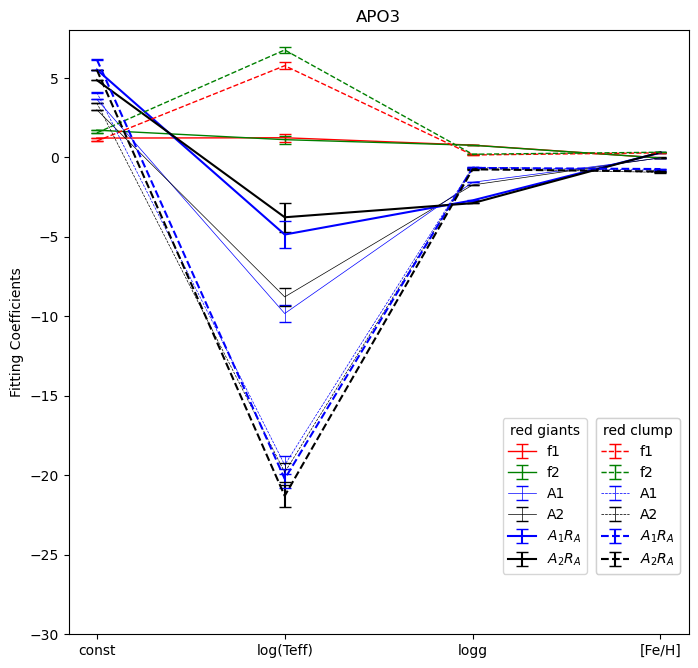

In [13]:
#transformed coefficient plot from APO3 Radius overplotted on untransformed one
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

%matplotlib inline
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_A$')
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_A$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_A$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_A$')
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)

#lines 3, 4, 10, 11 not showing up?

#Amps corrected for APO3 radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.title('APO3')
plt.show()

In [14]:
#ALL FITTING COEFFS FROM GRAPH ABOVE

print('APO3 red giant coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,0])
print('FREQ 2')
print(Tg_coeffs[:,1,0])
print('AMP 1')
print(Tg_coeffs[:,2,0])
print('AMP 2')
print(Tg_coeffs[:,3,0])
print('APO3 AMP 1')
print(Tg_coeffs[:,4,0])
print('APO3 AMP 2')
print(Tg_coeffs[:,5,0], '\n')

print('APO3 red clump coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,1])
print('FREQ 2')
print(Tg_coeffs[:,1,1])
print('AMP 1')
print(Tg_coeffs[:,2,1])
print('AMP 2')
print(Tg_coeffs[:,3,1])
print('APO3 AMP 1')
print(Tg_coeffs[:,4,1])
print('APO3 AMP 2')
print(Tg_coeffs[:,5,1], '\n')

APO3 red giant coefficients
---------------------------
FREQ 1
[ 1.21749774  1.23889042  0.77595851 -0.03265557]
FREQ 2
[ 1.71478433  1.11835558  0.76515745 -0.03224622]
AMP 1
[ 3.65773256 -9.81908812 -1.56267368 -0.0323873 ]
AMP 2
[ 2.9979083  -8.77353216 -1.73239109 -0.01834655]
APO3 AMP 1
[ 5.52396042 -4.85188284 -2.7018406   0.30129024]
APO3 AMP 2
[ 4.86349083 -3.76436103 -2.87772019  0.32267611] 

APO3 red clump coefficients
---------------------------
FREQ 1
[1.03027981 5.77080913 0.15567649 0.2896658 ]
FREQ 2
[1.54633854 6.76099406 0.20125821 0.32727603]
AMP 1
[  4.08869488 -19.34750493  -0.60715568  -0.80702151]
AMP 2
[  3.42893417 -19.81187559  -0.70185907  -0.93976798]
APO3 AMP 1
[  6.16212644 -20.22112844  -0.6602523   -0.73017541]
APO3 AMP 2
[  5.51010671 -21.28941588  -0.74851134  -0.88402403] 



A1_RG
[  3.66359347 -10.37443534  -1.93290392  -0.0452274 ]
[0.00411703 0.55782711 0.0124876  0.01731535]
A1_RC
[  4.08478907 -18.72387079  -1.33715895  -0.78681168]
[0.01273339 0.5838005  0.03424734 0.02541736]
A2_RG
[ 3.00390034 -9.1042833  -2.06108398 -0.02829878]
[0.00458347 0.61476158 0.0137264  0.01895025]
A2_RC
[  3.43563765 -19.49635632  -1.42323392  -0.93882159]
[0.01408491 0.66979898 0.03747503 0.02911494]


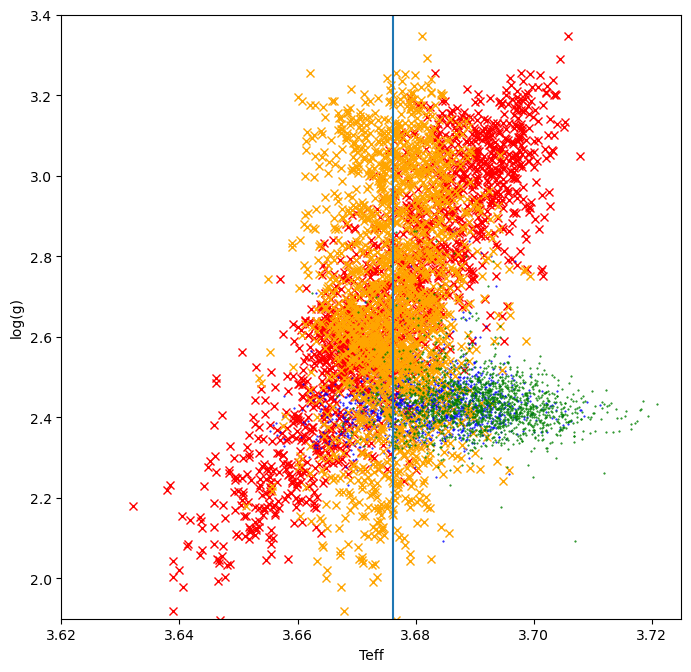

In [15]:
#GAIA data rotated, not radius corrected
#issues with theta_G...

#%matplotlib inline
figure(figsize=(8,8), dpi=100)
         
red_giant_G = np.where(Evol_stage_G == 1)
red_clump_G = np.where(Evol_stage_G == 2)
#print(Teff_final[red_giant_G])

mean_logg = np.mean(logg_final_G[red_giant_G])
mean_l_teff = np.mean(log_Teff_final_G[red_giant_G])
#print(mean_logg, mean_l_teff)
#print(mean_l_teff) #neg value in log_Teff_final bc of runtime warning in Teff_final, printing nan

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final_G[red_giant_G])-mean_l_teff), logg_final_G[red_giant_G]-mean_logg, sigma=(logg_final_G_err[red_giant_G]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7

theta_G = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#rotated plots
x_prime = ((np.log10(Teff_final_G)-mean_l_teff)*np.cos(theta_G)) - ((logg_final_G-mean_logg)*np.sin(theta_G))
y_prime = ((np.log10(Teff_final_G)-mean_l_teff)*np.sin(theta_G)) + ((logg_final_G-mean_logg)*np.cos(theta_G))
coeffs = np.ones((4, 6, 2)) #switch 2 and 4?
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Freq_HV1_G[red_giant_G]), sigma=(Freq_HV1_G_err_log[red_giant_G]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Freq_HV1_G[red_clump_G]), sigma=(Freq_HV1_G_err_log[red_clump_G]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Freq_HV2_G[red_giant_G]), sigma=(Freq_HV2_G_err_log[red_giant_G]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Freq_HV2_G[red_clump_G]), sigma=(Freq_HV2_G_err_log[red_clump_G]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant_G)
#print(red_clump_G)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Amp_HV1_G[red_giant_G]), sigma=(Amp_HV1_G_err_log[red_giant_G]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Amp_HV1_G[red_clump_G]), sigma=(Amp_HV1_G_err_log[red_clump_G]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Amp_HV2_G[red_giant_G]), sigma=(Amp_HV2_G_err_log[red_giant_G]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Amp_HV2_G[red_clump_G]), sigma=(Amp_HV2_G_err_log[red_clump_G]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(np.log10(Teff_final_G[red_giant_G]), logg_final_G[red_giant_G], 'rx')
plt.plot(np.log10(Teff_final_G[red_clump_G]), logg_final_G[red_clump_G], 'b.', ms=1)
plt.plot(x_prime[red_giant_G] + mean_l_teff, y_prime[red_giant_G] + mean_logg, 'x', color='orange')
plt.plot(x_prime[red_clump_G] + mean_l_teff, y_prime[red_clump_G] + mean_logg, 'g.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
plt.xlim(3.62, 3.725)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

In [16]:
#fit in rotated atm params with respect to Gaia R corrected amps
#with sigma

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Amp_R_HV1_Gaia[red_giant_G]), sigma=(Amp_R_HV1_Gaia_err_log[red_giant_G]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Amp_R_HV1_Gaia[red_clump_G]), sigma=(Amp_R_HV1_Gaia_err_log[red_clump_G]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant_G], y_prime[red_giant_G], FeH_final_G[red_giant_G]), np.log10(Amp_R_HV2_Gaia[red_giant_G]), sigma=(Amp_R_HV2_Gaia_err_log[red_giant_G]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump_G], y_prime[red_clump_G], FeH_final_G[red_clump_G]), np.log10(Amp_R_HV2_Gaia[red_clump_G]), sigma=(Amp_R_HV2_Gaia_err_log[red_clump_G]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump_G]))
#print(np.shape(x_prime[red_clump_G]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.53873896 -5.95065758 -2.91025009  0.27860147]
[0.00613588 0.91694279 0.01904004 0.02772421]
A1_RC
[  6.15140929 -19.84033242  -1.45030675  -0.69386675]
[0.01434253 0.64915916 0.0392123  0.0281248 ]
A2_RG
[ 4.87086821 -5.55764492 -3.02994194  0.28377535]
[0.00675918 0.9736147  0.02068394 0.02950886]
A2_RC
[  5.50260214 -20.74917415  -1.5569109   -0.85176526]
[0.01609653 0.74820358 0.04357745 0.03240875]


In [17]:
#matched subsample of giants+clump of A1 and A2 with Gaia R
N_RC = np.size(red_clump_G)
log_Teff_final_RG = log_Teff_final_G[red_giant_G]
log_Teff_final_RC = log_Teff_final_G[red_clump_G]
logg_final_RG = logg_final_G[red_giant_G]
logg_final_RC = logg_final_G[red_clump_G]
FeH_final_RG = FeH_final_G[red_giant_G]
FeH_final_RC = FeH_final_G[red_clump_G]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant_G))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)

index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))

index_RC = index_RC[iu]
index_RG = index_RG[iu]

#amplitude 1 red giants and clump subsample
Amp_HV1_RG = Amp_R_HV1_Gaia[red_giant_G]
Amp_HV1_RC = Amp_R_HV1_Gaia[red_clump_G]

index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_G_err_log[red_giant_G]

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

#x = [log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]]
#sx = [Teff_G_err_log[index_RG], logg_final_G_err[index_RG], FeH_final_G_err[index_RG]]
#A1_data = RealData(x, [np.log10(Amp_HV1_G[index_RG])], sx=sx, sy=[Amp_HV1_G_err[index_RG]])

Amp_HV1_err_log_RC = Amp_HV1_G_err_log[red_clump_G]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

#amplitude 2 red giants and clump subsample
Amp_HV2_RG = Amp_R_HV2_Gaia[red_giant_G]
Amp_HV2_RC = Amp_R_HV2_Gaia[red_clump_G]

index_inliers = np.where((np.log10(Amp_HV2_RG[index_RG])-np.log10(Amp_HV2_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV2_err_log_RG = Amp_HV2_G_err_log[red_giant_G]

A2_Rg_s_opt, A2_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV2_RG[index_RG]), sigma=(Amp_HV2_err_log_RG[index_RG]))
A2_Rg_s_perr = np.sqrt(np.diag(A2_Rg_s_cov))
print()
print('A2_RG_s')
print(A2_Rg_s_opt)
print(A2_Rg_s_perr)

Amp_HV2_err_log_RC = Amp_HV2_G_err_log[red_clump_G]

A2_Rc_s_opt, A2_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV2_RC[index_RC]), sigma=(Amp_HV2_err_log_RC[index_RC]))
A2_Rc_s_perr = np.sqrt(np.diag(A2_Rc_s_cov))
print('A2_RC_s')
print(A2_Rc_s_opt)
print(A2_Rc_s_perr)

A1_RG_s
[183.71571653 -47.91834336  -0.72841156  -0.52330306]
[25.89758555  7.19738104  0.30700354  0.23238951]
A1_RC_s
[ 62.1514241  -15.00819939  -0.2695965   -0.52944989]
[11.66784067  3.23924806  0.15038853  0.10873669]

A2_RG_s
[176.48620073 -46.01244424  -0.8914465   -0.4247619 ]
[25.47381592  7.07809962  0.30773624  0.22383936]
A2_RC_s
[ 59.99126726 -14.43890511  -0.50144413  -0.63372235]
[14.66485416  4.06627636  0.17601443  0.12952737]


[0.02835209 0.02924787 0.03125613 0.03392138 0.03830364 0.05504215
 0.06637038 0.07517306 0.08053813 0.08166617 0.08913011 0.09219749
 0.09441348 0.10056257 0.10689895 0.1103659  0.11508171 0.11559339
 0.1179376  0.11798344 0.12054216 0.12313285 0.12374643 0.14541117
 0.15957043 0.16862323 0.17078664 0.17652297 0.18141052 0.18787414
 0.19203437 0.19932487 0.20141957 0.21031322 0.2176099  0.22116059
 0.23178676 0.23941279 0.25910535 0.26475914 0.2657549  0.26709226
 0.27091059 0.27646509 0.28092862 0.28388185 0.28722948 0.29151865
 0.35452122 0.36368379 0.37942086 0.4152656  0.43985549 0.46397714
 0.68465725 0.72036506]


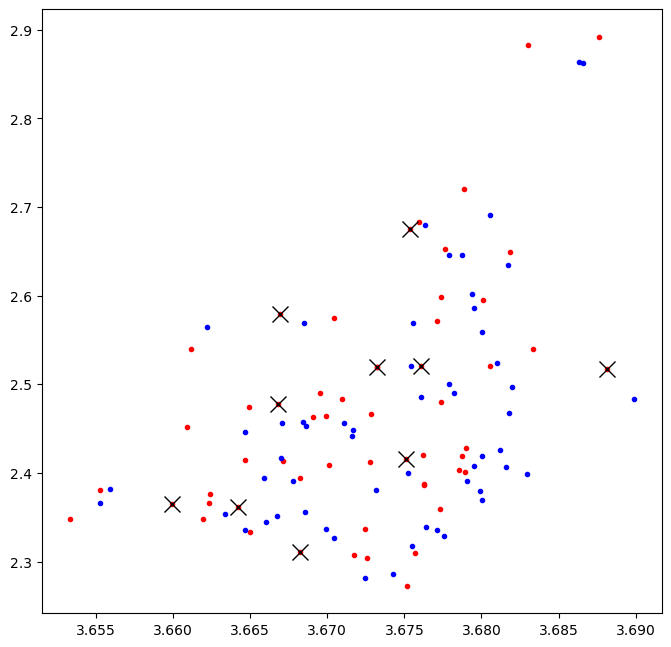

  KIC  
-------
4465237
7346442
5521176
3662421
5806787
7585696
4756746
2165710
3942191
4750456


In [18]:
#KIC ID pairs of RG/RC A1 with logTeff and logg (GAIA)

#difference between A1(Teff) and A1(Teff) matched subsample for RG 
list1 = np.array(np.log10(Amp_HV1_RG[index_RG])) #Observed HV1 amps
list2 = np.array(amp_curve_fit((log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), A1_Rg_s_opt[0], A1_Rg_s_opt[1], A1_Rg_s_opt[2], A1_Rg_s_opt[3])) #1 for Teff values
#difference between A1(Teff) and A1(Teff) matched subsample for RC
list3 = np.array(np.log10(Amp_HV1_RC[index_RC])) #Observed HV1 amps
list4 = np.array(amp_curve_fit((log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), A1_Rc_s_opt[0], A1_Rc_s_opt[1], A1_Rc_s_opt[2], A1_Rc_s_opt[3]))

set_diff = np.sqrt((list1 - list2)**2 + (list3 - list4)**2)
list_diff = np.array(set_diff)

#smallest difference bewtween the two
inds = np.argsort(list_diff)
print(list_diff[inds])

figure(figsize=(8,8), dpi=100)
plt.plot(log_Teff_final_RG[index_RG], logg_final_RG[index_RG],'r.')
plt.plot(log_Teff_final_RC[index_RC], logg_final_RC[index_RC],'b.')
plt.plot(log_Teff_final_RG[index_RG[inds[0:10]]], logg_final_RG[index_RG[inds[0:10]]],'kx', markersize=12)
plt.show()

#print KIC nums for the 10 X's, email
#repeat for A2 (higher frequency)
#try orthogonal fitting for whole data set to see how it works

print(KIC_final[index_RG[inds[0:10]]])

[0.020945   0.02913834 0.03510232 0.04367015 0.05337127 0.05992047
 0.06498775 0.08458029 0.08568273 0.08715    0.09032889 0.09325391
 0.09468391 0.10153274 0.1062463  0.10984291 0.11499434 0.12460753
 0.13096347 0.14476438 0.15635532 0.16022867 0.16217335 0.17143495
 0.17666033 0.17718079 0.18462939 0.18466108 0.20081007 0.20609188
 0.20748684 0.2101082  0.2118237  0.21413988 0.21587566 0.21592333
 0.2338432  0.23699596 0.2607133  0.26139445 0.26499664 0.26592276
 0.26715093 0.29527991 0.29856128 0.32421272 0.34199808 0.36893165
 0.37323699 0.37555611 0.39898089 0.48093249 0.54692786 0.58818346
 0.70026739 0.79284874]


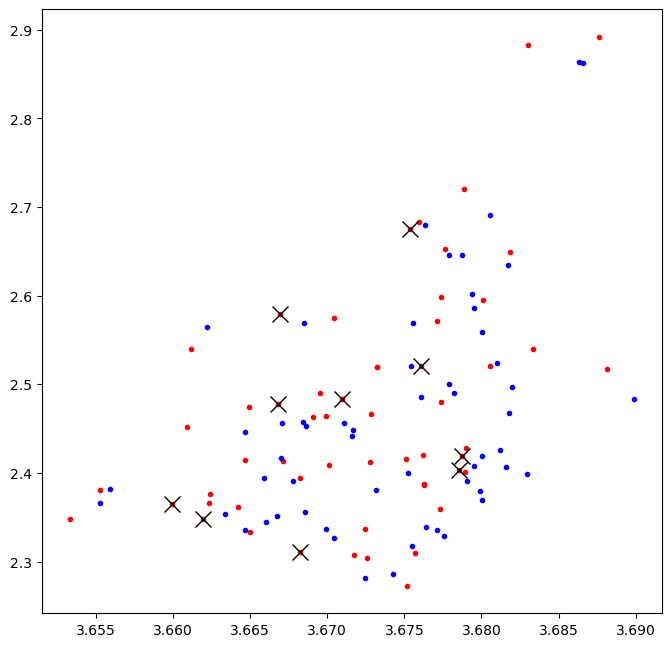

  KIC  
-------
4756746
5197249
3942191
4750456
4378405
7346442
2165710
4774298
4850790
5521176


In [19]:
#KIC ID pairs of RG/RC A2 with logTeff and logg (GAIA)

#difference between A2(Teff) and A2(Teff) matched subsample for RG 
list1 = np.array(np.log10(Amp_HV2_RG[index_RG])) #Observed HV1 amps
list2 = np.array(amp_curve_fit((log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), A2_Rg_s_opt[0], A2_Rg_s_opt[1], A2_Rg_s_opt[2], A2_Rg_s_opt[3])) #1 for Teff values
#difference between A2(Teff) and A2(Teff) matched subsample for RC
list3 = np.array(np.log10(Amp_HV2_RC[index_RC])) #Observed HV2 amps
list4 = np.array(amp_curve_fit((log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), A2_Rc_s_opt[0], A2_Rc_s_opt[1], A2_Rc_s_opt[2], A2_Rc_s_opt[3]))

set_diff = np.sqrt((list1 - list2)**2 + (list3 - list4)**2)
list_diff = np.array(set_diff)

#smallest difference bewtween the two
inds = np.argsort(list_diff)
print(list_diff[inds])

figure(figsize=(8,8), dpi=100)
plt.plot(log_Teff_final_RG[index_RG], logg_final_RG[index_RG],'r.')
plt.plot(log_Teff_final_RC[index_RC], logg_final_RC[index_RC],'b.')
plt.plot(log_Teff_final_RG[index_RG[inds[0:10]]], logg_final_RG[index_RG[inds[0:10]]],'kx', markersize=12)
plt.show()

print(KIC_final[index_RG[inds[0:10]]])

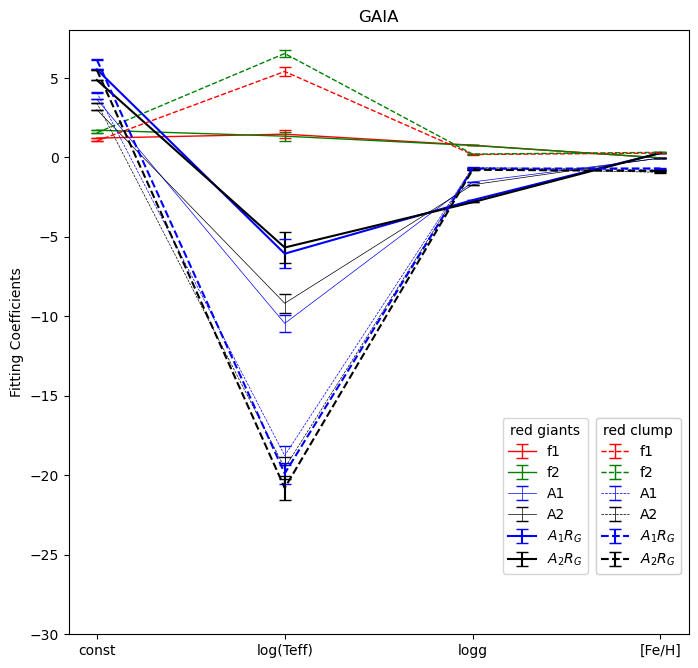

In [20]:
%matplotlib inline
#transformed coefficient plot from GAIA Radius overplotted on untransformed one
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

%matplotlib inline
Tg_coeffs_G = np.ones([4, 6, 2])
Tg_coeffs_G_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs_G[0, i, j] = coeffs[0, i, j]
        Tg_coeffs_G[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs_G[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs_G[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_G_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_G_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_G_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_G_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,0,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,1,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,2,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,3,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,4,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_G$')
line6 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,5,0], 4), yerr = np.reshape(Tg_coeffs_G_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_G$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,0,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,1,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,2,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,3,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,4,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_G$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs_G[:,5,1], 4), yerr = np.reshape(Tg_coeffs_G_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_G$')
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for Gaia radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.title('GAIA')
plt.show()

In [21]:
#ALL FITTING COEFFS FROM GRAPH ABOVE

print('Gaia red giant coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,0])
print('FREQ 2')
print(Tg_coeffs[:,1,0])
print('AMP 1')
print(Tg_coeffs[:,2,0])
print('AMP 2')
print(Tg_coeffs[:,3,0])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,0])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,0], '\n')

print('Gaia red clump coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,1])
print('FREQ 2')
print(Tg_coeffs[:,1,1])
print('AMP 1')
print(Tg_coeffs[:,2,1])
print('AMP 2')
print(Tg_coeffs[:,3,1])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,1])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,1], '\n')

Gaia red giant coefficients
---------------------------
FREQ 1
[ 1.21749774  1.23889042  0.77595851 -0.03265557]
FREQ 2
[ 1.71478433  1.11835558  0.76515745 -0.03224622]
AMP 1
[ 3.65773256 -9.81908812 -1.56267368 -0.0323873 ]
AMP 2
[ 2.9979083  -8.77353216 -1.73239109 -0.01834655]
GAIA AMP 1
[ 5.52396042 -4.85188284 -2.7018406   0.30129024]
GAIA AMP 2
[ 4.86349083 -3.76436103 -2.87772019  0.32267611] 

Gaia red clump coefficients
---------------------------
FREQ 1
[1.03027981 5.77080913 0.15567649 0.2896658 ]
FREQ 2
[1.54633854 6.76099406 0.20125821 0.32727603]
AMP 1
[  4.08869488 -19.34750493  -0.60715568  -0.80702151]
AMP 2
[  3.42893417 -19.81187559  -0.70185907  -0.93976798]
GAIA AMP 1
[  6.16212644 -20.22112844  -0.6602523   -0.73017541]
GAIA AMP 2
[  5.51010671 -21.28941588  -0.74851134  -0.88402403] 



(array([   0.,    0.,    0.,    0.,    0.,   30., 1231.,  456.,   36.,
           3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([ 1.  ,  2.45,  3.9 ,  5.35,  6.8 ,  8.25,  9.7 , 11.15, 12.6 ,
        14.05, 15.5 , 16.95, 18.4 , 19.85, 21.3 , 22.75, 24.2 , 25.65,
        27.1 , 28.55, 30.  ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7f824ab1ad60>])

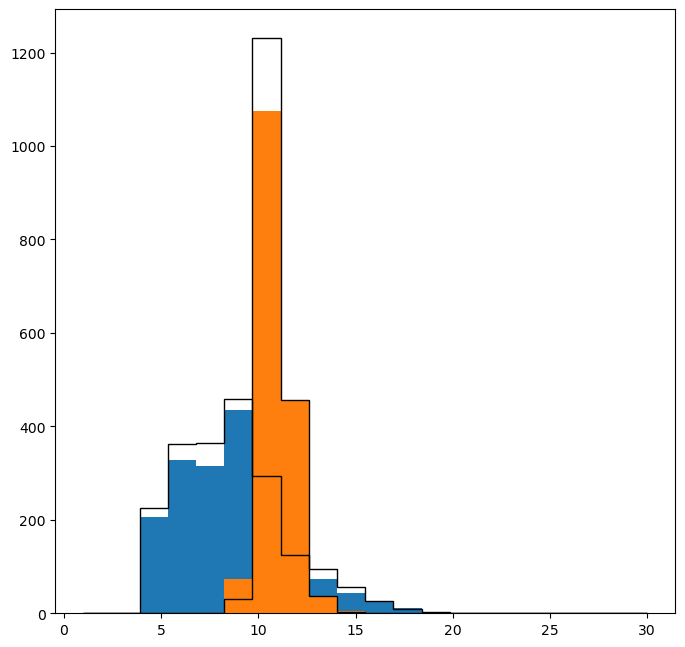

In [22]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
#plt.ylim(0, 30)  
plt.hist(R_Gaia_final[red_giant_G], bins = 20, range = (1, 30))
plt.hist(R_Gaia_final[red_clump_G], bins = 20, range = (1, 30))
plt.hist(R_APO3_final[red_giant], histtype='step', color = 'black', bins = 20, range = (1, 30))
plt.hist(R_APO3_final[red_clump], histtype='step', color = 'black', bins = 20, range = (1, 30))
#print(min(R_Gaia_final), max(R_Gaia_final))
#print(min(R_APO3_final), max(R_APO3_final)) 
#interesect KIC from both Gaia and APO3 then plot

Beta: [ 2.91513920e+02 -7.76554532e+01 -1.67583097e-01 -1.15637010e+00]
Beta Std Error: [36.45594694 10.12382877  0.40310871  0.27912219]
Beta Covariance: [[ 1.11487462e+10 -3.09543537e+09  8.61736972e+07 -6.54029663e+07]
 [-3.09543537e+09  8.59763184e+08 -2.43971542e+07  1.82026465e+07]
 [ 8.61736972e+07 -2.43971542e+07  1.36311852e+06 -5.61580089e+05]
 [-6.54029663e+07  1.82026465e+07 -5.61580089e+05  6.53548757e+05]]
Residual Variance: 1.192094648334626e-07
Inverse Condition #: 0.00023062703826252277
Reason(s) for Halting:
  Iteration limit reached
0.007480340373080351
0.2647933077833584
0.03905751942067681
0.21679745423504365


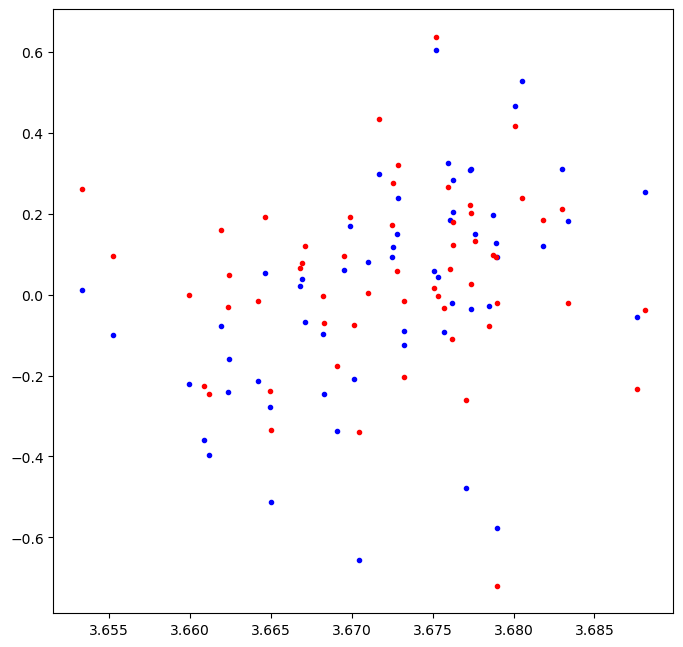

In [61]:
def odr_fit(A, X):
    x,y,z = X
    return A[0]+A[1]*x+A[2]*y+A[3]*z

x = [log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]]
sx = [Teff_G_err_log[index_RG], logg_final_G_err[index_RG], FeH_final_G_err[index_RG]]
A1_data = RealData(x, [np.log10(Amp_HV1_RG[index_RG])], sx=sx, sy=[Amp_HV1_err_log_RG[index_RG]])
linear = Model(odr_fit)
beta0 = [183.7, -48.0, -0.73, -0.52]
A1_odr = ODR(A1_data, linear, beta0=beta0)
A1_output = A1_odr.run()
A1_output.pprint()

#np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))

#linear = Model(odr_fit), sx=sx, sy=
#my_data = RealData((log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), sx=Teff_G_err_log, sy=logg_final_G_err)#, sz=FeH_final_G_err)
#myodr = ODR(my_data, linear, beta0=[#?])
#myoutput = myodr.run()
#myoutput.pprint()

#x = log_Teff_final_RG[index_RG]
#y = logg_final_RG[index_RG]
#z = FeH_final_RG[index_RG]
#data = odr.Data(x,y,z)
#odr_obj = odr.ODR(data, odr.multilinear)
#output = odr_obj.run()
#print(output.beta)
figure(figsize=(8,8), dpi=100)

fit_diff_orth = np.log10(Amp_HV1_RG[index_RG])-log_Teff_final_RG[index_RG]*(-7.76554532e+01)-2.91513920e+02-logg_final_RG[index_RG]*(-1.67583097e-01)-FeH_final_RG[index_RG]*(-1.15637010e+00)
fit_diff_ls = np.log10(Amp_HV1_RG[index_RG])-log_Teff_final_RG[index_RG]*(A1_Rg_s_opt[1])-logg_final_RG[index_RG]*(A1_Rg_s_opt[2])-FeH_final_RG[index_RG]*(A1_Rg_s_opt[3])-A1_Rg_s_opt[0]
plt.plot(log_Teff_final_RG[index_RG], (np.log10(Amp_HV1_RG[index_RG]))-log_Teff_final_RG[index_RG]*(-7.76554532e+01)-2.91513920e+02-logg_final_RG[index_RG]*(-1.67583097e-01)-FeH_final_RG[index_RG]*(-1.15637010e+00), 'b.') #orth distance fitting
#plt.plot(log_Teff_final_RG[index_RG], log_Teff_final_RG[index_RG]*(-7.76554532e+01)+2.91513920e+02)
plt.plot(log_Teff_final_RG[index_RG], (np.log10(Amp_HV1_RG[index_RG]))-log_Teff_final_RG[index_RG]*(A1_Rg_s_opt[1])-logg_final_RG[index_RG]*(A1_Rg_s_opt[2])-FeH_final_RG[index_RG]*(A1_Rg_s_opt[3])-A1_Rg_s_opt[0], 'r.') #least square fitting
print(np.mean(fit_diff_orth))
print(np.std(fit_diff_orth))

print(np.mean(fit_diff_ls))
print(np.std(fit_diff_ls))


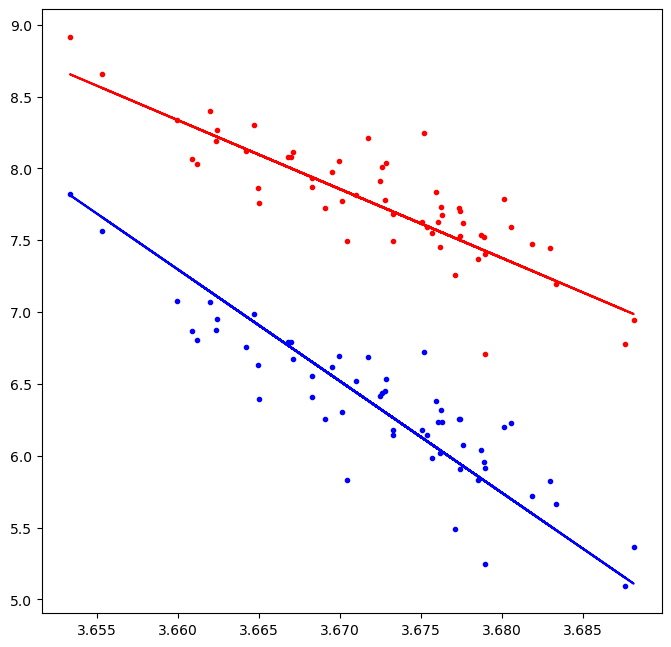

In [60]:
figure(figsize=(8,8), dpi=100)
plt.plot(log_Teff_final_RG[index_RG], (np.log10(Amp_HV1_RG[index_RG]))-logg_final_RG[index_RG]*(-1.67583097e-01)-FeH_final_RG[index_RG]*(-1.15637010e+00), 'b.') #orth distance fitting
plt.plot(log_Teff_final_RG[index_RG], (np.log10(Amp_HV1_RG[index_RG]))-logg_final_RG[index_RG]*(A1_Rg_s_opt[2])-FeH_final_RG[index_RG]*(A1_Rg_s_opt[3]), 'r.')#least square fitting
plt.plot(log_Teff_final_RG[index_RG], log_Teff_final_RG[index_RG]*(-7.76554532e+01)+2.91513920e+02, 'b') #orth fit
plt.plot(log_Teff_final_RG[index_RG], log_Teff_final_RG[index_RG]*A1_Rg_s_opt[1]+A1_Rg_s_opt[0], 'r') #ls fit


In [ ]:
#[183.71571653 -47.91834336  -0.72841156  -0.52330306]
#[25.89758555  7.19738104  0.30700354  0.23238951] err